In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib est la bibliothèque fondamentale de visualisation de données en Python. Sa complexité vient souvent du fait qu'il existe deux façons de l'utiliser. Comprendre cette distinction est la clé pour passer de "copier-coller du code sans comprendre" à "maîtriser ses graphiques".

Voici les deux interfaces :

* L'interface Fonctionnelle (Pyplot / MATLAB-style) : Rapide, implicite.

* L'interface Orientée Objet (OO) : Explicite, puissante, professionnelle.

## 1. L'Approche Fonctionnelle (State-Machine)
C'est l'interface historique, conçue pour ressembler à MATLAB. Elle est gérée par le module pyplot.

Le concept  
C'est une "machine à états". Matplotlib garde en mémoire la Figure courante et l'Axe courant. Lorsque vous lancez une commande de traçage, elle s'applique automatiquement à ce qui est "actif" à ce moment-là. Vous ne manipulez pas les objets directement. Il faut faire alors attention à l'ordre des méthodes appelées.

In [2]:
# Je créé ici des données synthétiques (fonction sinus)
x = np.linspace(0, 10, 100)
y = np.sin(x)

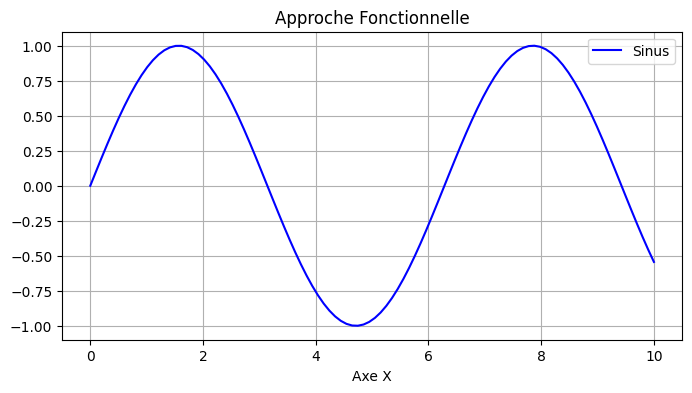

In [3]:
# Création du graphique de manière fonctionnelle
plt.figure(figsize=(8, 4)) # Crée une figure (devient la figure courante)
plt.plot(x, y, label='Sinus', color='blue') # Dessine sur l'axe courant
plt.title("Approche Fonctionnelle") # Titre sur l'axe courant
plt.xlabel("Axe X")
plt.legend() # On appelle .legend() pour afficher ce qui se trouve en valeurr du paramètre "label" de plt.plot()
plt.grid(True)

plt.show()

Avantage : Très rapide pour explorer des données à la volée ou pour des graphiques simples. Inconvénient : Devient un cauchemar dès que vous voulez gérer plusieurs sous-graphiques (subplots) complexes, car il est difficile de savoir "qui est l'axe courant".

## 2. L'Approche Orientée Objet (OO)
C'est l'approche recommandée pour tout développement sérieux ou script réutilisable.

Le concept
Ici, nous séparons explicitement deux conteneurs principaux :

La Figure (fig) : C'est le conteneur global, la "feuille de papier" ou la fenêtre.

Les Axes (ax) : C'est la zone de traçage (le graphique lui-même) qui contient les courbes, les échelles, les étiquettes.

Vous créez ces objets, puis vous appelez des méthodes sur ces objets spécifiques.

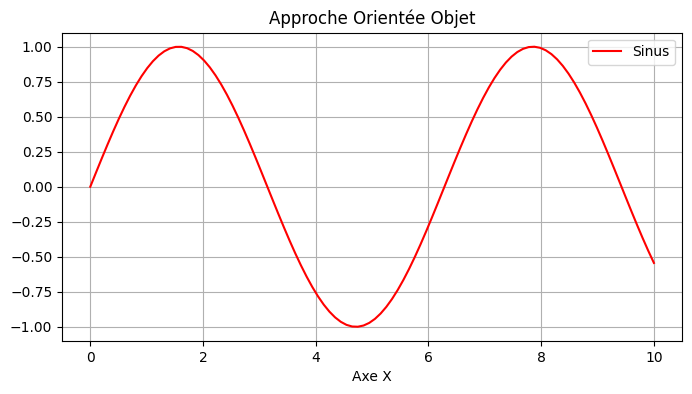

In [4]:
# 1. On crée explicitement les objets Figure et Axes
fig, ax = plt.subplots(figsize=(8, 4))

# 2. On appelle des méthodes SUR l'objet 'ax'
ax.plot(x, y, label='Sinus', color='red')
ax.set_title("Approche Orientée Objet") # Notez le 'set_'
ax.set_xlabel("Axe X")
ax.legend()
ax.grid(True)

# Affichage via la figure ou pyplot
plt.show()

A noter : Souvent, les noms des méthodes changent légèrement entre les deux modes.

Fonctionnel : plt.title()

Orienté Objet : ax.set_title()

Pour visualiser les deux méthodes, dites vous ceci :

Mode Fonctionnel : Vous criez des ordres à un assistant invisible ("Prends un pinceau !", "Mets du bleu !", "Dessine une ligne !"). L'assistant peint sur la toile qu'il a devant lui.

Mode Orienté Objet : Vous prenez le pinceau vous-même et vous dites "Sur cette toile précise, dans ce cadre précis, je dessine une ligne".

## 3. Un cas concret : Les Subplots (sous-graphiques)
C'est ici que l'approche Objet brille par sa clarté. Supposons que nous voulons deux graphiques côte à côte.



### En mode objet (recommandé) :

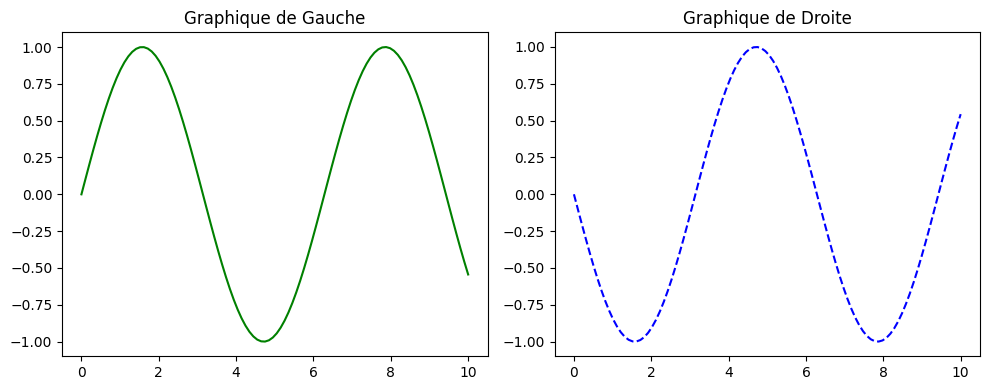

In [9]:
# On demande 1 ligne, 2 colonnes.
# 'ax' devient un tableau (array) contenant deux objets Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Graphique 1 : Gauche
ax1.plot(x, y, 'g')
ax1.set_title("Graphique de Gauche")

# Graphique 2 : Droite
ax2.plot(x, -y, 'b--')
ax2.set_title("Graphique de Droite")

plt.tight_layout() # Ajuste l'espacement automatiquement
plt.show()

### En mode fonctionnel  

(reste tout de même assez claire après c'est en fonction de vos préférences)

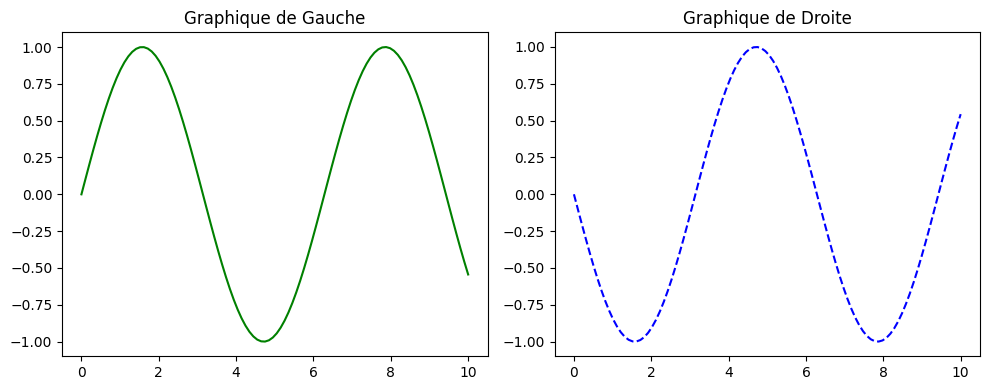

In [ ]:
# 1. On définit la taille globale de la figure
plt.figure(figsize=(10, 4))

# Graphique 1 : gauche 
# On "active" la case 1 (1 ligne, 2 colonnes, position 1)
plt.subplot(1, 2, 1) 
plt.plot(x, y, 'g')
plt.title("Graphique de Gauche")  # Notez: .title() et non .set_title()

# Graphique 2 : droite
# On "active" la case 2 (1 ligne, 2 colonnes, position 2)
plt.subplot(1, 2, 2)
plt.plot(x, -y, 'b--')
plt.title("Graphique de Droite")

# Ajustement et affichage
plt.tight_layout()
plt.show()

## 5. Les différents types de graphiques

Choisir le bon graphique est une compétence essentielle en Data Science. Un graphique ne sert pas seulement à "faire joli", il sert à répondre à une question précise sur vos données.

In [5]:
# --- 1. Préparation des données ---
x = np.linspace(0, 10, 50)
y_line = np.sin(x)
y_scatter = x + np.random.normal(0, 1, 50) # x avec un peu de bruit que je rajoute

In [6]:
categories = ['A', 'B', 'C', 'D', 'E']
valeurs = [15, 85, 40, 25, 60]

data_dist = np.random.randn(1000) # Distribution normale pour histo/box

### Line plot : l'évolution

Question : "Comment cette valeur change-t-elle au fil du temps ?"

Utilité : C'est le standard pour visualiser des séries temporelles ou des données continues. Il relie les points pour montrer une tendance (hausse, baisse, cycle).

Exemple : Évolution du prix d'une action, température au cours de la journée, trafic sur un site web par heure.

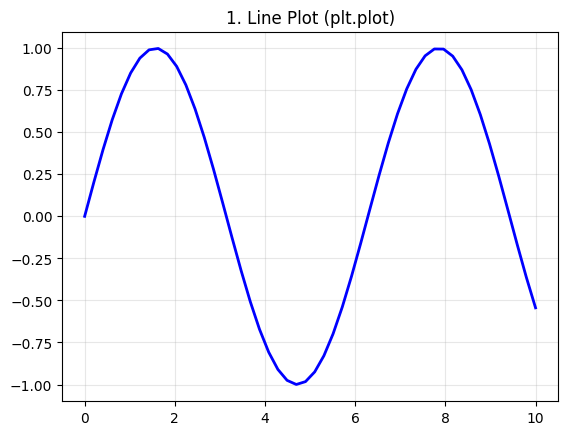

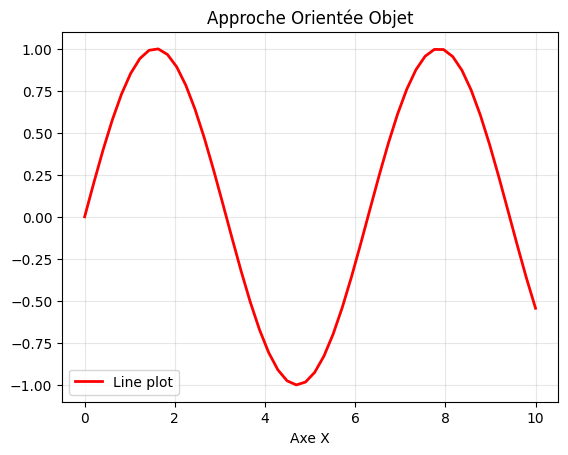

In [ ]:
plt.plot(x, y_line, color='blue', linestyle='-', linewidth=2)
plt.title("1. Line Plot (plt.plot)")
plt.grid(True, alpha=0.3)
plt.show()


# 1. On crée explicitement les objets Figure et Axes
fig, ax = plt.subplots()

# 2. On appelle des méthodes SUR l'objet 'ax'
ax.plot(x, y_line, label='Line plot', color='red', linestyle='-', linewidth=2)
ax.set_title("1. Line plot Approche Orientée Objet") # Notez le 'set_'
ax.set_xlabel("Axe X")
ax.legend()
ax.grid(True, alpha=0.3)

# Affichage via la figure ou pyplot
plt.show()

### Scatter Plot (nuage de points) : La corrélation

Question : "Y a-t-il un lien entre la variable A et la variable B ?"

Utilité : Il permet de voir si deux variables évoluent ensemble (corrélation). Chaque point est une observation unique. On cherche des motifs (une ligne droite, un nuage dispersé, une forme courbe).

Exemple : Prix d'une maison en fonction de sa surface (plus c'est grand, plus c'est cher ?), poids en fonction de la taille.

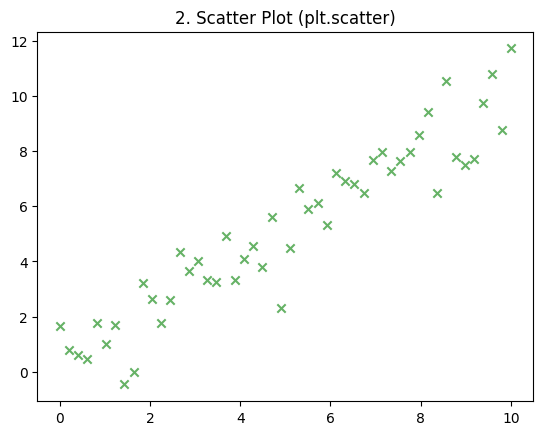

/tmp/ipykernel_13608/501928276.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


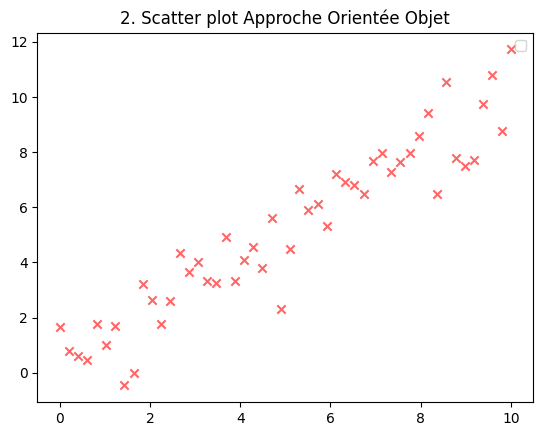

In [14]:
plt.scatter(x, y_scatter, color='green', alpha=0.6, marker='x')
plt.title("2. Scatter Plot (plt.scatter)")
plt.show()

# 1. On crée explicitement les objets Figure et Axes
fig, ax = plt.subplots()

# 2. On appelle des méthodes SUR l'objet 'ax'
ax.scatter(x, y_scatter, color='red', alpha=0.6, marker='x')
ax.set_title("2. Scatter plot Approche Orientée Objet") # Notez le 'set_'
ax.legend()

# Affichage via la figure ou pyplot
plt.show()

### Bar Plot (siagramme en bâtons) : La comparaison

Question : "Quelle catégorie est la plus grande / la plus petite ?"

Utilité : Comparer des quantités entre des groupes distincts (catégories).

Vertical : Standard pour peu de catégories (ex: < 10).

Horizontal : Indispensable quand les noms des catégories sont longs ou qu'il y en a beaucoup.

Exemple : Chiffre d'affaires par département, nombre de ventes par marque de voiture.

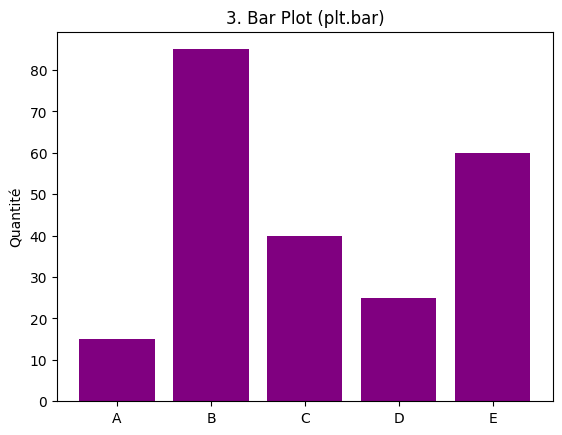

In [7]:
plt.bar(categories, valeurs, color='purple')
plt.title("3. Bar Plot (plt.bar)")
plt.ylabel("Quantité")
plt.show()

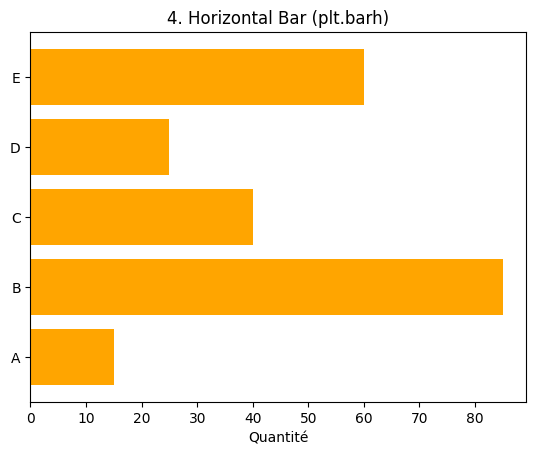

In [21]:
plt.barh(categories, valeurs, color='orange')
plt.title("4. Horizontal Bar (plt.barh)")
plt.xlabel("Quantité")
plt.show()

### Histogramme : la distribution

Question : "Comment sont réparties mes données ? Sont-elles centrées ? Y a-t-il plusieurs groupes ?"

Utilité : Il découpe une variable continue en intervalles (bins) et compte combien de données tombent dans chaque intervalle. C'est fondamental pour vérifier si vos données suivent une "Loi Normale" (courbe en cloche).

Attention : Ne pas confondre avec le Bar Plot ! L'histogramme n'a pas d'espace entre les barres et traite une seule variable numérique.

Exemple : Répartition des notes d'une classe (combien ont eu entre 0-5, 5-10, 10-15...), répartition des salaires dans une entreprise.

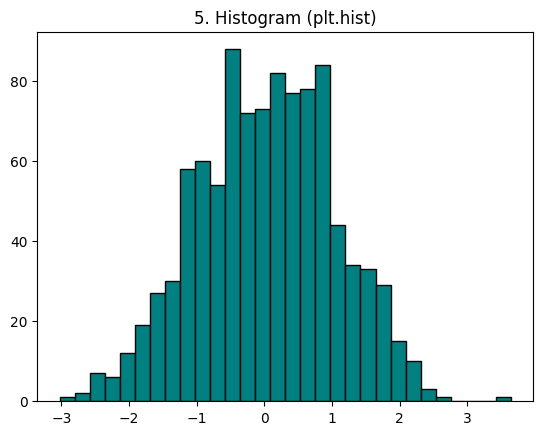

In [22]:
plt.hist(data_dist, bins=30, color='teal', edgecolor='black')
plt.title("5. Histogram (plt.hist)")
plt.show()

### Boxplot : Le résumé statistique

Question : "Où se situe la majorité des données et y a-t-il des anomalies (outliers) ?"

Utilité : C'est le graphique le plus "dense" en informations statistiques. Il montre en un coup d'œil :

La médiane (la barre au milieu).

L'écart interquartile (la boîte = 50% des données centrales).

Les valeurs extrêmes ou aberrantes (les points au-delà des "moustaches").

Exemple : Comparer les salaires hommes/femmes (médiane, écarts), détecter des transactions frauduleuses (valeurs aberrantes).

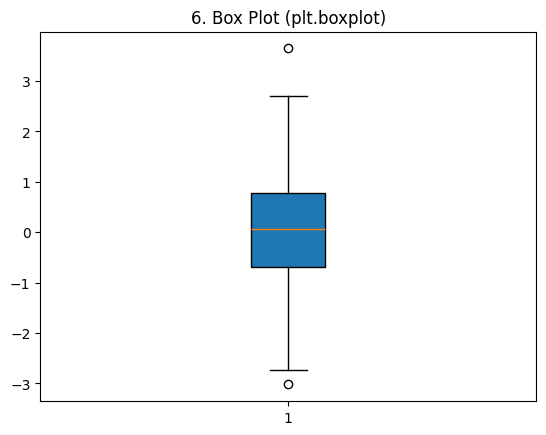

In [23]:
plt.boxplot(data_dist, vert=True, patch_artist=True)
plt.title("6. Box Plot (plt.boxplot)")
plt.show()

## Exercices

### Exercice 1

Pour les différents graphiques exposés dans la dernière section, réécrire le code en mode orienté objet

### Exercice 2 : Le Tableau de Bord (Subplots)
Objectif : Choisir le bon graphique pour la bonne question et gérer deux axes côte à côte.

Scénario : Vous analysez les notes d'une classe.

On veut voir la distribution des notes (combien d'élèves ont eu entre 0-5, 5-10, etc.).

On veut voir s'il y a un lien entre le temps de révision et la note.

In [24]:
notes = np.random.normal(12, 3, 100)  # Distribution des notes
heures_revision = np.random.uniform(1, 10, 100)
# Corrélation artificielle pour l'exercice
notes_corr = heures_revision * 1.5 + np.random.normal(0, 2, 100)

Créez une figure avec 1 ligne et 2 colonnes.

Sur le graphique de gauche (ax1) : Quel type de graphique faut-il pour voir la distribution des notes ? Tracez-le.

Sur le graphique de droite (ax2) : Quel type de graphique faut-il pour voir le lien entre heures_revision (x) et notes_corr (y) ? Tracez-le.

Utilisez plt.tight_layout() à la fin.

### Exercice 3

Données simulées :

In [27]:
mois = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin']
ventes = [12000, 15000, 11000, 18000, 19000, 22000]

budget_pub = np.array([200, 500, 300, 800, 950, 1100])
ventes_scatter = budget_pub * 10 + np.random.normal(0, 500, 6)

categories = ['Elec', 'Vêt', 'Maison', 'Jardin']
ca_par_cat = [45000, 32000, 15000, 5000]

ages_clients = np.random.normal(35, 10, 200) # Moyenne 35 ans

Dashboard Marketing

Scénario : Vous êtes Data Analyst pour une chaîne de magasins. Votre manager veut un résumé visuel sur une seule page (Figure) contenant :

Ventes mensuelles (Line Plot).

Budget Pub vs Ventes (Scatter Plot).

Ventes par Catégorie (Bar Plot Horizontal).

Distribution de l'âge des clients (Histogramme).

Consignes strictes (Mode Orienté Objet) :

Créez une figure et une grille d'axes de 2 lignes et 2 colonnes (nrows=2, ncols=2). Définissez une grande taille de figure (ex: 12, 8).

Graphique 1 (Haut-Gauche - ax[0, 0]) : Tracez l'évolution des ventes par mois (Ligne rouge avec des marqueurs ronds).

Graphique 2 (Haut-Droite - ax[0, 1]) : Tracez la relation budget_pub vs ventes_scatter (Nuage de points bleu).

Graphique 3 (Bas-Gauche - ax[1, 0]) : Tracez le ca_par_cat (Barres horizontales vertes).

Défi supplémentaire : Ajoutez une ligne verticale rouge en pointillés à x=20000 pour montrer l'objectif (utilisez ax.axvline(20000, ...)).

Graphique 4 (Bas-Droite - ax[1, 1]) : Tracez la distribution des ages_clients (Histogramme gris).

Programmation "Clean" : Au lieu d'écrire 4 fois ax.set_title ou ax.grid, faites une boucle for sur tous vos axes pour activer la grille sur chacun d'eux.

Indice : L'objet ax créé par subplots est une matrice numpy 2x2. Pour boucler dessus facilement, utilisez ax.flat.

À vous de jouer !